In [1]:
#reading the imput file, which contains the irradiance (total downward cosine irradiance at sea level, 
#simulated with cloud optical depth, with different volume fractions)
filename = 'COD_Vf.txt'
infile = open(filename, 'r')
data1 = infile.read()
infile.close()


In [2]:
#splitting data into rows
raw1 = data1.split('\n')

#print(row)
downward_irradiance = []

for i in range(len(raw1)):
    if i%7 == 6:
        downward_irradiance.append(float(raw1[i]))
        
#clear sky downward cosine irradiance at sea level
clear_sky = 9.34771617e-01

irradiance_ratio = []

for i in range(len(downward_irradiance)):
    irradiance_ratio.append(float(downward_irradiance[i])*100/clear_sky)

In [3]:
#import 'cloud_profile.txt' file
filename = 'cloud_profile.txt'
infile = open(filename, 'r')
data2 = infile.read()
infile.close()

#splitting data into rows
raw2 = data2.split('\n')

volume_fraction = []

for i in range(len(raw2)):
    element = raw2[i].split()
    volume_fraction.append(float(element[1]))

[8.08026028e+01 8.48829645e+06 8.78992082e+00]


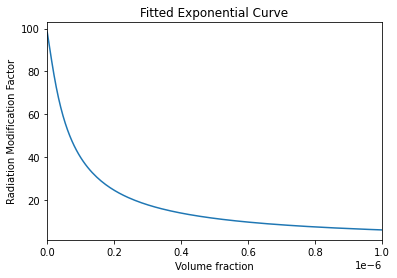

In [4]:
#plot irradiance(with cloud)/irradiance(clear sky) VS volume fraction
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
from pylab import *
from scipy.optimize import curve_fit


#define exponential function
def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

# perform the fit
popt, pcov = curve_fit(monoExp, volume_fraction,irradiance_ratio)

#popt: optimized parameters, pcov: optimized covariant parameters

# plot the results
#plt.scatter(volume_fraction,irradiance_ratio)
plt.plot(volume_fraction,irradiance_ratio)
# plt.plot(volume_fraction, monoExp(volume_fraction,*popt))
plt.title("Fitted Exponential Curve")
plt.xlabel('Volume fraction')
plt.ylabel('Radiation Modification Factor')
plt.xlim(0, 1e-06)
plt.savefig('RMF_vs_Vf.pdf', dpi = 300)
print(popt)
